In [29]:
import random
import numpy as np
import time
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb

# import regressors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# change the working

os.chdir("/Users/IggyMac/OneDrive - UvA/2020-2021/Data mining/Github/basic_assignment/assignment_1_task1/Spotify")

# read data

data = pd.read_csv("data/spotify_songs.txt")
print(data.columns)

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/IggyMac/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/IggyMac/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


# 1. Set prediction target

In [9]:
y = data.track_popularity

# 2. Choose features amd split the data

In [10]:
data_features = ['playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

X = data[data_features]
print(X.describe())

# encode the categorical variables
X = pd.get_dummies(X)

       danceability        energy           key      loudness          mode  \
count  32833.000000  32833.000000  32833.000000  32833.000000  32833.000000   
mean       0.654850      0.698619      5.374471     -6.719499      0.565711   
std        0.145085      0.180910      3.611657      2.988436      0.495671   
min        0.000000      0.000175      0.000000    -46.448000      0.000000   
25%        0.563000      0.581000      2.000000     -8.171000      0.000000   
50%        0.672000      0.721000      6.000000     -6.166000      1.000000   
75%        0.761000      0.840000      9.000000     -4.645000      1.000000   
max        0.983000      1.000000     11.000000      1.275000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  32833.000000  32833.000000      32833.000000  32833.000000   
mean       0.107068      0.175334          0.084747      0.190176   
std        0.101314      0.219633          0.224230      0.154317   
min        0

In [11]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## 2.1 f-regression feature selection

In [73]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    print(X_train.columns[i])
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# 3. Models

In [20]:
# declare the model
linear_model = LinearRegression()
random_forest = RandomForestRegressor(random_state = 1, n_estimators = 250)

# 3.1 Fit model

In [21]:
linear_model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=1)

## 3.2 Predict 

In [22]:
from sklearn.metrics import mean_absolute_error
predictions_linear = linear_model.predict(X_test)
predictions_rf = random_forest.predict(X_test)
mean_absolute_error(y_test, predictions_linear)
mean_absolute_error(y_test, predictions_rf)

17.167495367306127

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

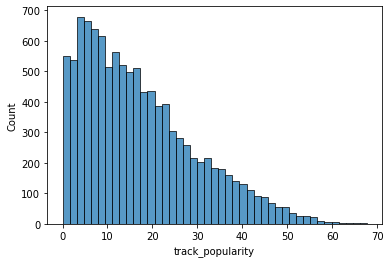

In [27]:
sns.histplot(np.abs(y_test - predictions_rf))

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

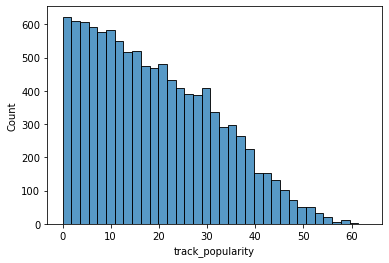

In [28]:
sns.histplot(np.abs(y_test - predictions_linear))

## 3.3 Cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(random_forest, X, y, cv=20, scoring='neg_mean_absolute_error')
print('Cross-validated scores:', scores)

KeyboardInterrupt: 

In [106]:
print(predictions)

[47.4526227  40.61513759 44.79096136 ... 50.37309135 42.88382861
 43.07294569]


# Extra for discussion

In [87]:
correlation_table = data.corr()
correlation_table["track_popularity"].reset_index()

,index,track_popularity
0,track_popularity,1.000000
1,danceability,0.064748
2,energy,-0.109112
3,key,-0.000650
4,loudness,0.057687
5,mode,0.010637
6,speechiness,0.006819
7,acousticness,0.085159
8,instrumentalness,-0.149872
9,liveness,-0.054584
